## Observations and Insights 

In [25]:
# Dependencies and Setup
%matplotlib notebook 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.DataFrame(pd.merge(mouse_metadata, study_results, how ="outer", on=["Mouse ID"]))

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Description of combined data 
merged_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [27]:
# Checking the number of mice.
unique_mice = merged_data["Mouse ID"].unique()

total_mice = len(unique_mice)

total_mice

249

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
print("Duplicate mice by ID:" + duplicate_mice)

['Duplicate mice by ID:g989']


In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
data_duplicated_mice = merged_data.loc[merged_data["Mouse ID"]=="g989"]
data_duplicated_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mice)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
# Checking the number of mice in the clean dataframe.
clean_mice = clean_data["Mouse ID"].value_counts()
clean_num_mice=len(clean_mice)
clean_num_mice

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_clean_data = clean_data.groupby(["Drug Regimen"])
mean_drug = grouped_clean_data.mean()["Tumor Volume (mm3)"]
median_drug = grouped_clean_data.median()["Tumor Volume (mm3)"]
var_drug = grouped_clean_data.var()["Tumor Volume (mm3)"]
sd_drug = grouped_clean_data.std()["Tumor Volume (mm3)"]
sem_drug = grouped_clean_data.sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({
    "Mean Tumor Volume (mm3)": mean_drug, 
    "Median Tumor Volume (mm3)": median_drug, 
    "Tumor Volume (mm3) Variance": var_drug, 
    "Tumor Volume (mm3) Standard Deviation": sd_drug,
    "Tumor Volume (mm3) SEM": sem_drug
})

summary_stats


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_line_data = clean_data.groupby("Drug Regimen")
stats_summary_table = single_line_data.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
stats_summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


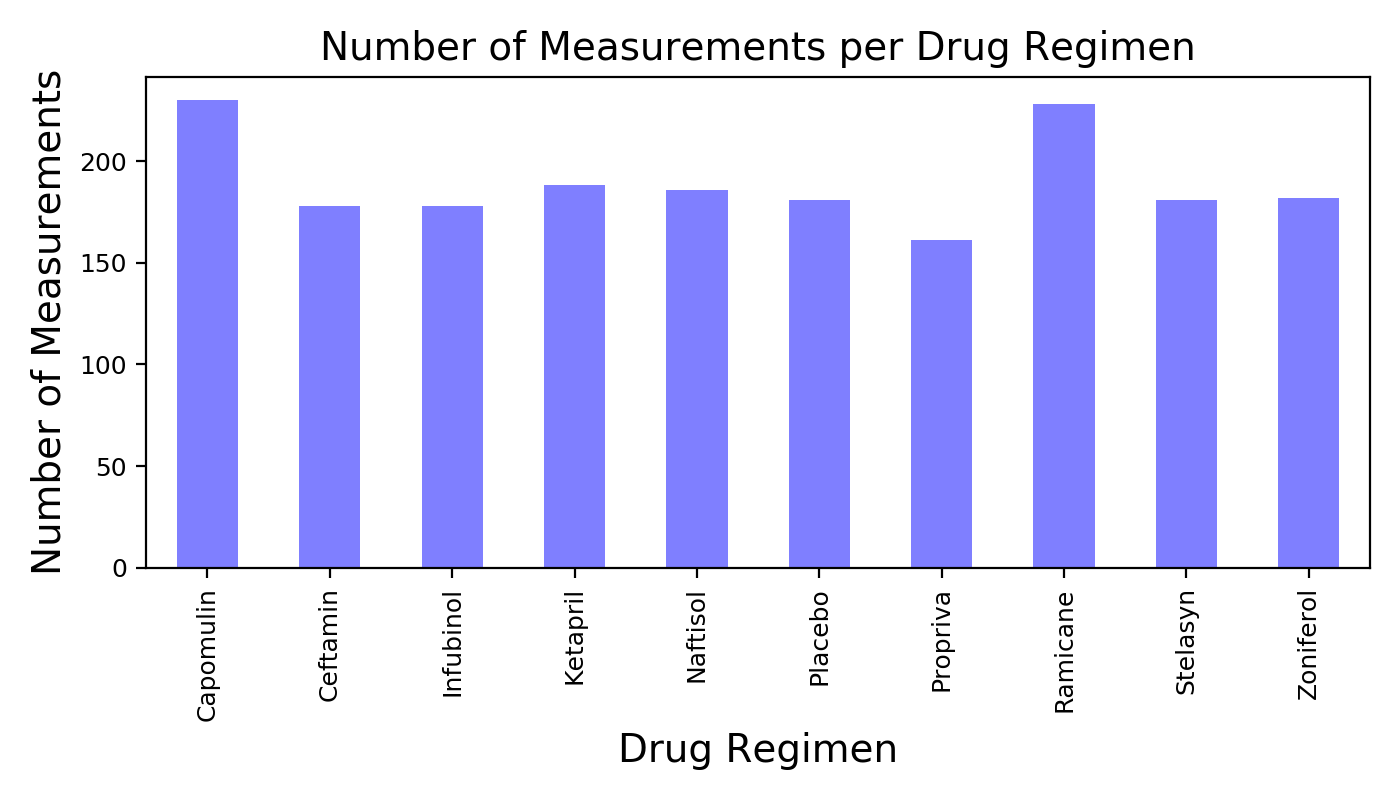

In [34]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_regimen = merged_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
count_regimen

bar_plot = count_regimen.plot.bar(figsize = (7,4), color = "b", alpha=0.5, align="center", fontsize = 9)
plt.xlabel("Drug Regimen", fontsize =14)
plt.ylabel("Number of Measurements", fontsize=14)
plt.title("Number of Measurements per Drug Regimen", fontsize=14)

plt.tight_layout()

bar_plot

<IPython.core.display.Javascript object>


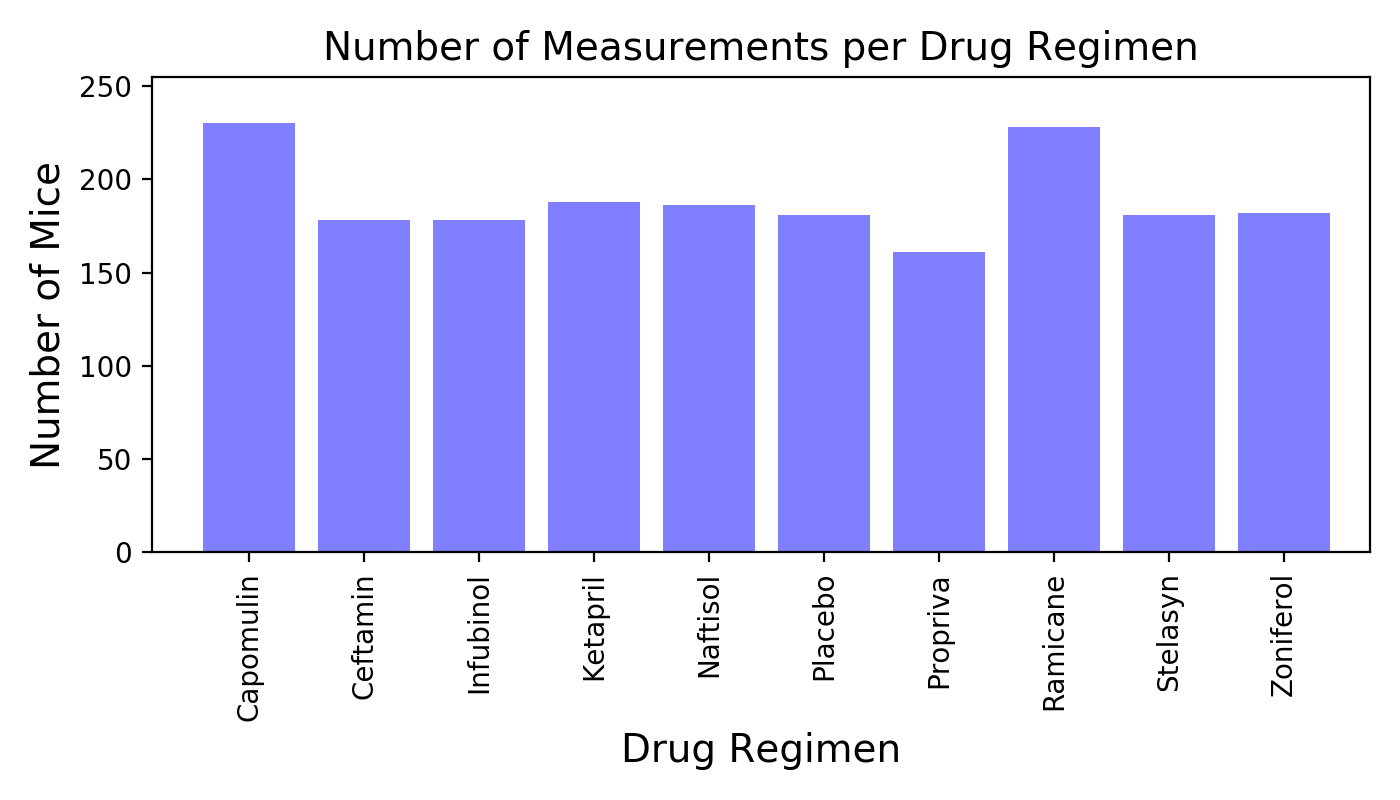

In [40]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

measurements_list = (merged_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()


x_axis = np.arange(len(count_regimen))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.bar(x_axis, measurements_list, color="b", alpha=0.5, align="center")

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

plt.xlim(-.85, len(x_axis)-0.25)

plt.ylim(0, max(measurements_list)+ 25)

plt.title("Number of Measurements per Drug Regimen", fontsize = 14)
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Number of Mice", fontsize = 14)

plt.tight_layout()



<IPython.core.display.Javascript object>


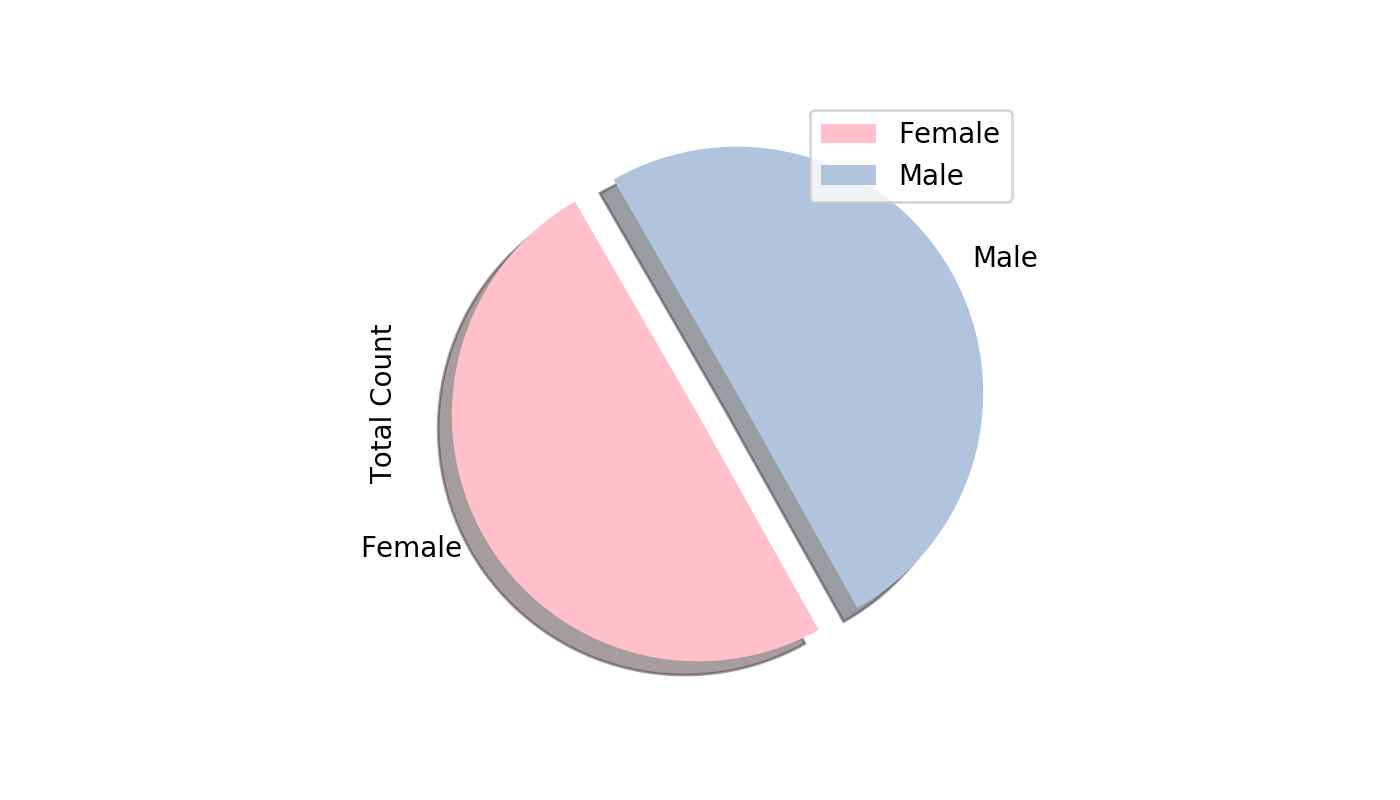

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_gender = merged_data.groupby(["Mouse ID", "Sex"])
grouped_gender 
gender_df = pd.DataFrame(grouped_gender.size())

mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percent of Gender"]=(100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender["Percent of Gender"]=mouse_gender["Percent of Gender"].map("{:,.2f}%".format)

mouse_gender

#pie plot using pandas

colors = ["pink", "lightsteelblue"]
explode = (.09, .09)

pie_plot = mouse_gender.plot.pie(y="Total Count", figsize=(7, 4), colors = colors, startangle=120, explode = explode, shadow=True)

plt.title("Male vs Female")
plt.show()

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
